# Discrete & Continuous Distribution

This note will summarize the distribution that we will frequently see when analyzing data.

You can refer to link https://www.datacamp.com/tutorial/probability-distributions-python for example.

Another link that might interest you is this https://www.spcforexcel.com/knowledge/basic-statistics/deciding-which-distribution-fits-your-data-best where the writer mentioned the steps to be taken to determine what kind of distribution that our dataset have. This writing helps me connect the dots for all the statistics knowledge that I have learned in college.

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

### Uniform Distribution
$$ f(x) = \begin{cases} \frac{1}{b-a} & a \le x \le b \\ 0 & x<a, x>b \end{cases}$$

15.062441170614472

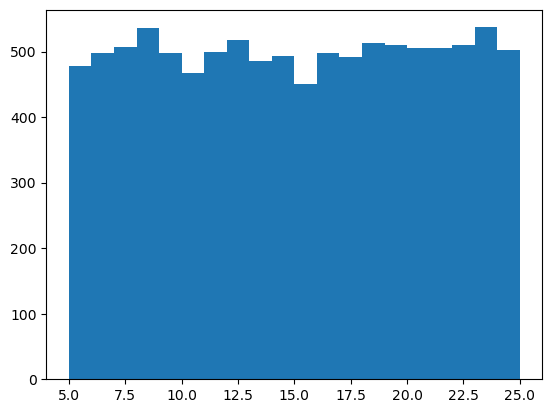

In [3]:
from scipy.stats import uniform

n=10000
start=5
width=20
data = uniform.rvs(size=n, loc=start, scale=width, random_state=12345)

fig, ax = plt.subplots(1,1)
ax.hist(data, bins=20)
data.mean()

Another way we can really claim that the generated data are from the uniform distribution is that from the histogram shown, most of the frequency for each bins are about 500 count. I.e, out of 10000 steps, there are about 500 times where the data generated falls into 1st bin, 2nd bin etc.. Thus, there are 500/10000 chances that the next data generated will fall into one of the bin.
This is the same answer that we'll get if we use the pdf for uniform distribution which is,

$$ f(x) = \frac{1}{b-a} = \frac{1}{25-5} = \frac{1}{20} = \frac{500}{10000} $$

### Normal distribution
$$ f(x) = \frac{1}{\sqrt{2\pi \sigma ^2}} e ^-\frac{(x-\mu)^2}{2\sigma ^2}$$

where $\mu$ is the mean and $\sigma^2$ is the variance

In [12]:
from scipy.stats import norm
data = norm.rvs(size=n,loc=0, scale=2)

-0.013121588293485751

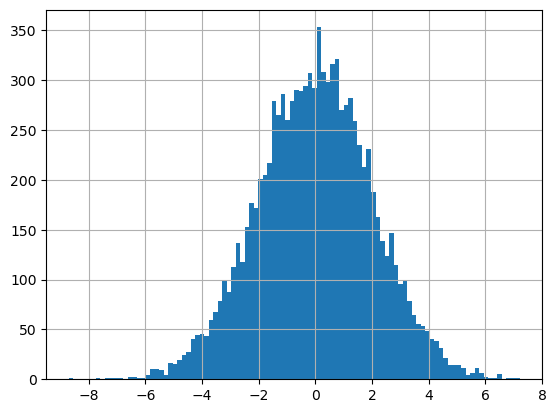

In [43]:
fig, ax = plt.subplots(1,1)
ax.hist(data, bins=100)
plt.grid()
data.mean()

In [19]:
1/np.sqrt(2*np.pi*4)

0.19947114020071635

the above calculation is to calculate the probability that we'll see 0 when we generate the next data point.
$$ f(x) = \frac{1}{\sqrt{2\pi \sigma ^2}} e ^-\frac{(x-\mu)^2}{2\sigma ^2}$$

$$ f(0) = \frac{1}{\sqrt{2\pi*2^2}} e^-\frac{(0-0)^2}{2 * 2^2}$$

$$ f(0) \approx 0.199$$